<a href="https://colab.research.google.com/github/puneet-08/projects/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

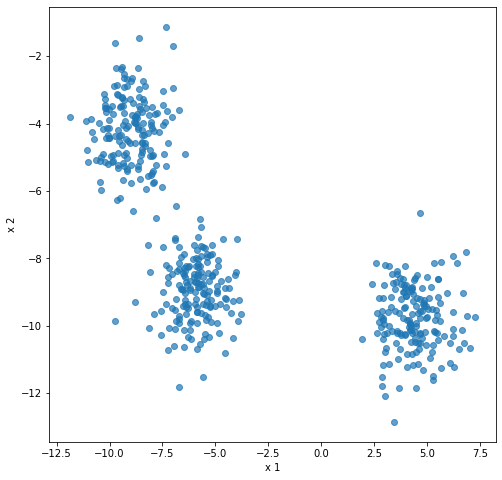

In [19]:
# Create Dataset

x_train, _ = make_blobs(n_samples= 500, centers= 3, n_features= 2, random_state=21)
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(x_train[:,0], x_train[:,1], marker = 'o', alpha = 0.7)
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.show()

We can vizualize there are three groups in the dataset. Our aim is to segregate each of the value into a particular group.

Strategy -
1. Let's assume there are k number of groups in our dataset.
2. Choose k random points as 'centroids'.
3. Calculate the distance of each point from the k centroids. Assign each instance in the dataset to group based on the least distance between the point and the centroid.
4. Calculate new centroid by taking mean value of each group.
5. Repeat steps 3 and 4 until the difference between new and old centoids is less than a threshold.

In [20]:
# Assigning random points as centroids

def initialize_centroids(k, X):
  centroids = []
  for i in range(k):
    cx1 = np.random.uniform(min(x_train[:,0]), max(x_train[:,0]))
    cx2 = np.random.uniform(min(x_train[:,1]), max(x_train[:,1]))
    centroids.append([cx1,cx2])
  return np.array(centroids)

In [21]:
# Helper function to calculate distance between two points

def dist(a,b):
  return np.sqrt(np.sum(np.square(a-b)))

In [22]:
# Assigning a cluster to each of the instance in the dataset

def assign_cluster(k, X , cg):
  group = [-1]*len(X)
  for i in range(len(X)):
    dist_array = []
    for j in range(k):
      dist_array.append(dist(cg[j],X[i]))
    group[i] = np.argmin(dist_array)

  return np.array(group)

In [23]:
# Recomputing centroids 

def compute_centroids(k,X, cluster):
  centroids = []
  for i in range(k):
    centroids.append(np.mean(X[cluster==i], axis =0))
  return np.array(centroids)

In [24]:
# Computing mean distance between old and new centroids

def measure(cg_old, cg_new):
  return np.sum(dist(cg_old, cg_new))

In [25]:
# Binding everything in a function

def k_means(k,X):
  cg_prev = initialize_centroids(k,X)
  group = assign_cluster(k,X,cg_prev)
  cg_change = 100
  while cg_change > 0.01:
    cluster_old = assign_cluster(k,X,cg_prev)
    cg_new = compute_centroids(k,X,cluster_old)
    cg_change = measure(cg_prev, cg_new)
    cg_prev = cg_new

  return assign_cluster(k,X,cg_prev)


In [27]:
# Predicting
# Let's assume there are 3 groups

new_cluster = k_means(3,x_train)
new_cluster

array([1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 1, 0,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 2,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2,
       2, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2,
       1, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0,
       1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1,

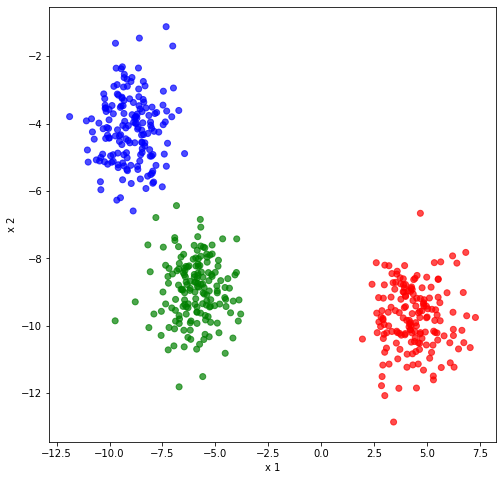

In [28]:
#Plotting Dataset with each instance colored accoding to the assigned cluster

colormap = np.array(['r','g','b'])
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(x_train[:,0], x_train[:,1], marker = 'o', alpha = 0.7, c = colormap[new_cluster])
plt.xlabel('x 1')
plt.ylabel('x 2')
plt.show()

Our model seem to do a good job in segregating each of the point into a group.